<a href="https://colab.research.google.com/github/vishnu-1221/project/blob/main/kmeans2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Desccription : the data contains ball-by-ball data for each delivery bowled in IPL matches from 2020 to 2025.
#It includes batting and bowling actions, extras, dismissals, boundary events, venue , city and pitch types
#based on the data we need to pick batters for the team selection


#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#importing the dataset
data=pd.read_csv('/content/all_matches_ball_by_ball1.csv')
print(data.shape)
data.head()

(83090, 16)


,match_id,date,venue,city,batting_team,batter,bowler,over,runs_batter,runs_extras,extras_type,wicket_taken,dismissal_kind,player_out,pitch_type,boundary
0,1216492,19-09-2020,Sheikh Zayed Stadium,Abu Dhabi,Mumbai Indians,RG Sharma,DL Chahar,0,4,0,NaN,0,NaN,NaN,Spin-friendly,4.0
1,1216492,19-09-2020,Sheikh Zayed Stadium,Abu Dhabi,Mumbai Indians,RG Sharma,DL Chahar,0,1,0,NaN,0,NaN,NaN,Spin-friendly,NaN
2,1216492,19-09-2020,Sheikh Zayed Stadium,Abu Dhabi,Mumbai Indians,Q de Kock,DL Chahar,0,2,0,NaN,0,NaN,NaN,Spin-friendly,NaN
3,1216492,19-09-2020,Sheikh Zayed Stadium,Abu Dhabi,Mumbai Indians,Q de Kock,DL Chahar,0,4,0,NaN,0,NaN,NaN,Spin-friendly,4.0
4,1216492,19-09-2020,Sheikh Zayed Stadium,Abu Dhabi,Mumbai Indians,Q de Kock,DL Chahar,0,0,0,NaN,0,NaN,NaN,Spin-friendly,NaN


In [ ]:
# Aggregate batsman stats
bat_stats = data.groupby('batter').agg({
    'runs_batter': ['sum', 'count'],
    'match_id': 'nunique'
}).reset_index()

# Rename columns
bat_stats.columns = ['batter', 'total_runs', 'balls_faced', 'matches_played']

# Remove players eho played very few deliveries
bat_stats = bat_stats[bat_stats['balls_faced'] > 30]
print(bat_stats)


                batter  total_runs  balls_faced  matches_played
0             A Badoni         638          510              36
2            A Manohar         231          182              16
4             A Nortje          49           51              13
5        A Raghuvanshi         193          131               8
9       AB de Villiers         773          511              28
..                 ...         ...          ...             ...
318           WG Jacks         241          140               9
319            WP Saha        1169          986              50
320  Washington Sundar         303          285              26
321        YBK Jaiswal        1608         1101              53
322          YS Chahal          16           40               5

[195 rows x 4 columns]


In [ ]:
#standardizing the values
from sklearn.preprocessing import StandardScaler

features = bat_stats[['total_runs', 'balls_faced', 'matches_played']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


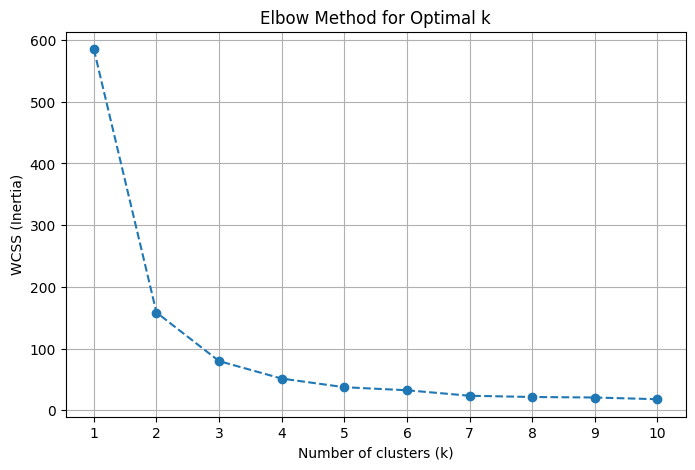

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use the scaled data from earlier

wcss = []  # Within-cluster sum of squares
#elbow method
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
bat_stats['Cluster'] = kmeans.fit_predict(X_scaled)


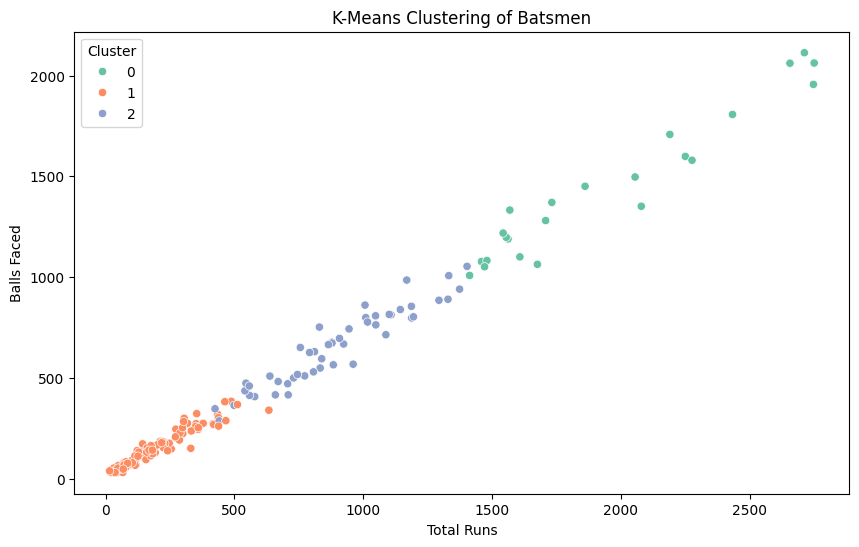

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=bat_stats, x='total_runs', y='balls_faced', hue='Cluster', palette='Set2')
plt.title('K-Means Clustering of Batsmen')
plt.xlabel('Total Runs')
plt.ylabel('Balls Faced')
plt.legend(title='Cluster')
plt.show()
